# ESR Frequency tracker

In [1]:
from iqtools import *
import numpy as np
from pylab import psd
import matplotlib.pyplot as plt
%matplotlib inline
from esr_frequency_tracker import *

In [2]:
infile = 'values_day_4-12.txt'
data = np.genfromtxt(infile)
first_time = data[0, 0]

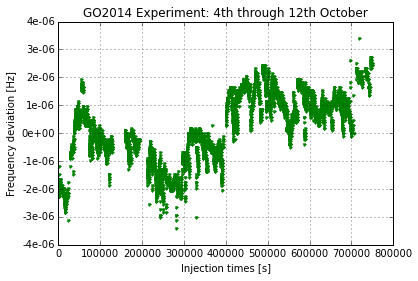

In [3]:
infile = 'values_day_4-12.txt'
data = np.genfromtxt(infile)
first_time = data[0, 0]
avg = ((data[:, 2]).max() + (data[:, 2]).min()) / 2
deviation = (data[:, 2] - avg) / avg
times = data[:, 0] - first_time
fig = plt.figure()
ax = fig.gca()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.plot(times, deviation, 'g.')
plt.xlabel('Injection times [s]')
plt.ylabel('Frequency deviation [Hz]')
plt.title('GO2014 Experiment: 4th through 12th October')
ax.grid(1)
plt.savefig('{}_deviation.pdf'.format(os.path.splitext(os.path.basename(infile))[0]))

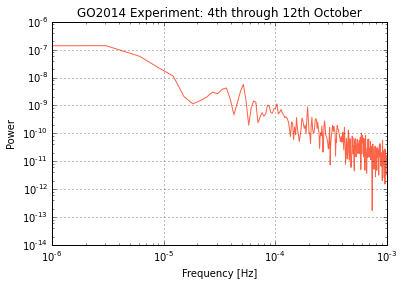

In [4]:
#f, p = get_pwelch(deviation, 1/80)
from scipy.signal import welch
f, p = welch(deviation, 1/80, nperseg=2**12)
fig = plt.figure()
ax = fig.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.plot(f, p, color='tomato', linestyle='-')
ax.set_xlim([1e-6,1e-3])
ax.set_xscale('log',  nonposx='clip')
ax.set_yscale('log',  nonposx='clip')
plt.grid(1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('GO2014 Experiment: 4th through 12th October')
plt.savefig('{}_spectrum.pdf'.format(os.path.splitext(os.path.basename(infile))[0]))

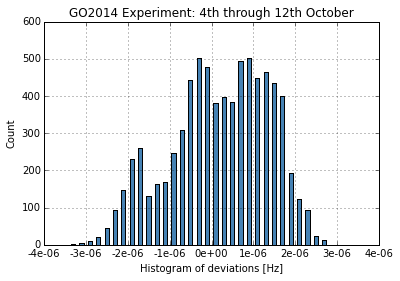

In [5]:
hist, bin_edges = np.histogram(deviation, bins=np.arange(deviation.min(), deviation.max(), 2e-7))
center = (bin_edges[:-1] + bin_edges[1:]) / 2
fig = plt.figure()
ax = fig.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.bar(center, hist, width = 1e-7, align='center', color='steelblue')
plt.grid(1)
plt.xlabel('Histogram of deviations [Hz]')
plt.ylabel('Count')
plt.title('GO2014 Experiment: 4th through 12th October')
plt.savefig('{}_histogram.pdf'.format(os.path.splitext(os.path.basename(infile))[0]))

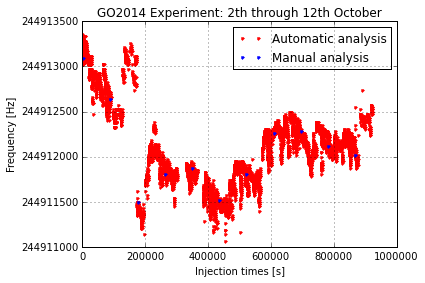

In [6]:
infile = 'values_day_2-12.txt'
infile_manual = 'GO2014/manual_analysis/manual_analysis_with_only_RSA51.txt'
data_auto = np.genfromtxt(infile)
data_manual = np.genfromtxt(infile_manual)
first_time = data_auto[0, 0]
times_auto = data_auto[:, 0] - first_time
times_manual = data_manual[:,0] - first_time
fig = plt.figure()
ax = fig.gca()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%8.0f'))
line1, = ax.plot(times_auto, data_auto[:,2], 'r.',label = 'Automatic analysis')
line2,= ax.plot(times_manual, data_manual[:, 1], 'b.', label = 'Manual analysis')
plt.legend(handles = [line1, line2], labels = ['asd', 'blopps'])
plt.xlabel('Injection times [s]')
plt.ylabel('Frequency [Hz]')
plt.title('GO2014 Experiment: 2th through 12th October')
ax.grid(1)
plt.tight_layout()
plt.savefig('{}_deviation_all.pdf'.format(os.path.splitext(os.path.basename(infile))[0]))

In [7]:
import time
import glob
tm_format = '%Y.%m.%d.%H.%M.%S'
for filename in glob.glob("one_o_clock/*.TIQ"):
    base = os.path.splitext(os.path.basename(filename))[0]
    datime = base[6:25]
    #print(datime)
    tm = time.strptime(datime, tm_format)
    print(time.mktime(tm))